# 0 - Install packages

In [ ]:
!pip install nnetsauce --upgrade --no-cache-dir

In [ ]:
!pip install tabpfn

In [45]:
import nnetsauce as ns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabpfn import TabPFNRegressor
from sklearn.linear_model import RidgeCV
from time import time

# 1 - Univariate

## 1 - 1 - a10

In [51]:
url = "https://raw.githubusercontent.com/Techtonique/datasets/main/time_series/univariate/a10.csv"
df = pd.read_csv(url)
df.index = pd.DatetimeIndex(df.date)
df.drop(columns=['date'], inplace=True)
df_a10 = df.copy()


url = "https://raw.githubusercontent.com/Techtonique/datasets/main/time_series/univariate/AirPassengers.csv"
df = pd.read_csv(url)
df.index = pd.DatetimeIndex(df.date)
df.drop(columns=['date'], inplace=True)
df_air = df.copy()

<Axes: xlabel='date'>

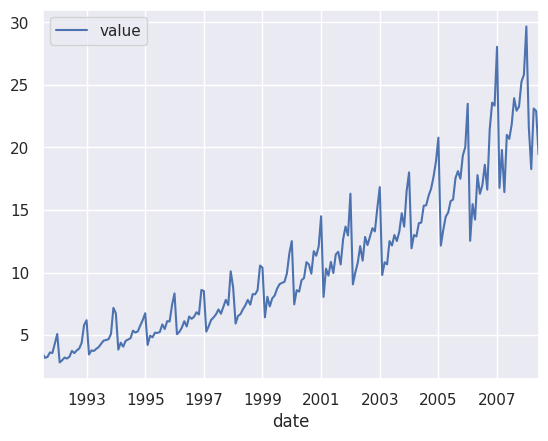

In [52]:
df_a10.plot()

<Axes: xlabel='date'>

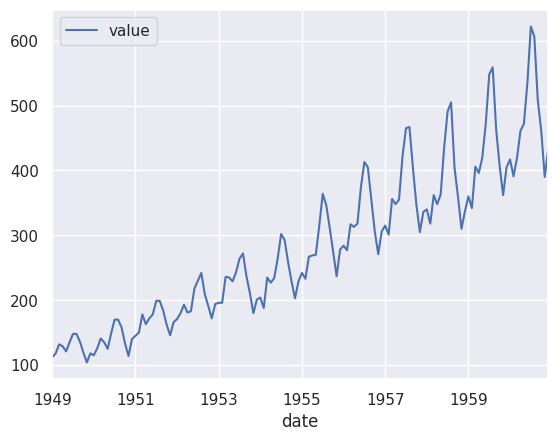

In [53]:
df_air.plot()

In [54]:
regr_ridge = ns.MTS(obj=RidgeCV(alphas=[10**i for i in range(-10, 10)]),
              type_pi="scp2-kde",
              replications=250,
              kernel='gaussian',
              lags=25)
start = time()
regr_ridge.fit(df_air)
regr_ridge.predict(h=40);
print("time: ", time() - start)

100%|██████████| 1/1 [00:00<00:00, 84.15it/s]


time:  1.274052381515503


In [55]:
regr_tabpfn = ns.MTS(obj=TabPFNRegressor(),
                     type_pi="scp2-kde",
                      replications=250,
                      kernel='gaussian',
                      lags=25)
start = time()
regr_tabpfn.fit(df_air)
regr_tabpfn.predict(h=40)
print("time: ", time() - start)

100%|██████████| 1/1 [00:15<00:00, 15.72s/it]


time:  287.80411529541016


In [56]:
import seaborn as sns

sns.set_theme(style="darkgrid")

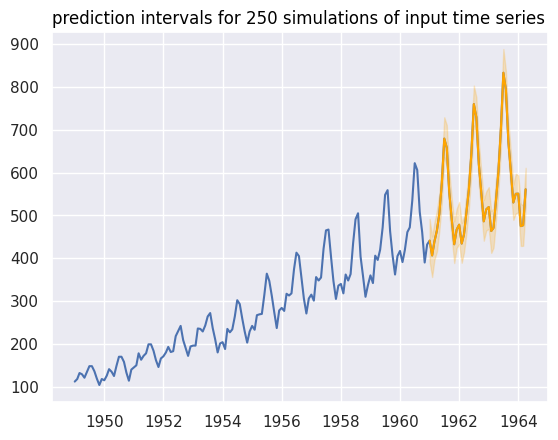

In [57]:
regr_ridge.plot(type_plot="pi")

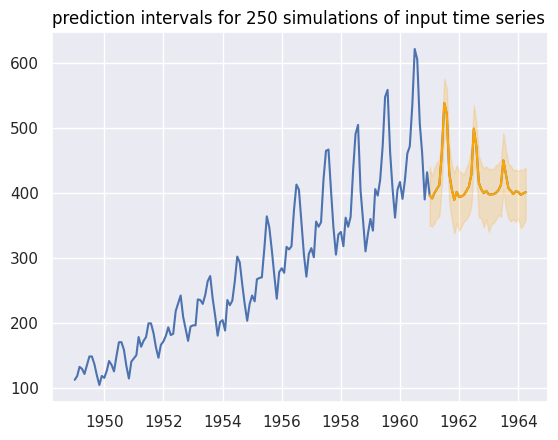

In [58]:
regr_tabpfn.plot(type_plot="pi")

## 1 - 2 - USAccDeaths

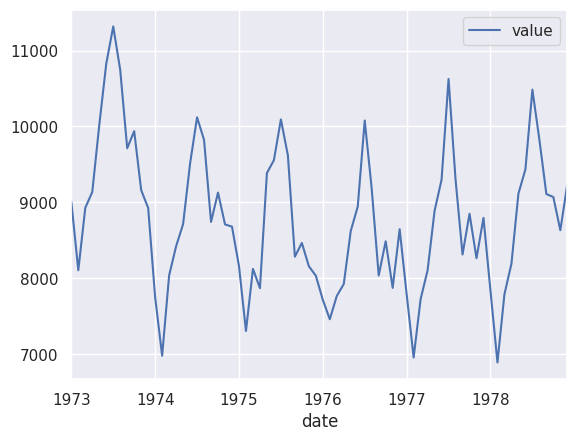

In [59]:
import pandas as pd

url = "https://raw.githubusercontent.com/Techtonique/datasets/main/time_series/univariate/USAccDeaths.csv"
df2 = pd.read_csv(url)
df2.index = pd.DatetimeIndex(df2.date)
df2.drop(columns=['date'], inplace=True)
df2.plot()

df_usacc = df2.copy()

In [60]:
regr2 = ns.MTS(obj=RidgeCV(alphas=[10**i for i in range(-10, 10)]),
              replications=250,
              type_pi="scp2-kde",
              kernel='gaussian',
              lags=15)
start = time()
regr2.fit(df_usacc)
regr2.predict(h=25);
print("time: ", time() - start)

100%|██████████| 1/1 [00:00<00:00, 112.52it/s]


time:  1.2207071781158447


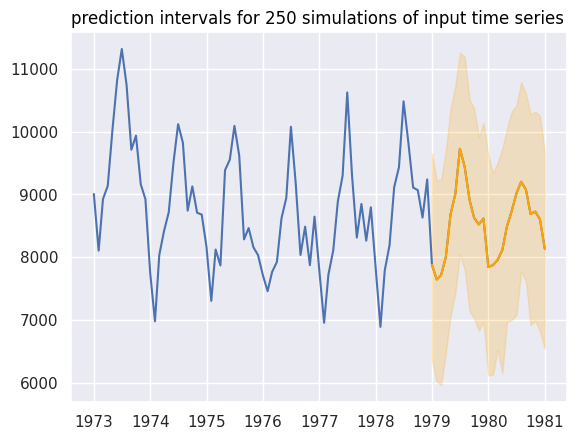

In [61]:
regr2.plot(type_plot="pi")

In [62]:
regr2 = ns.MTS(obj=TabPFNRegressor(),
              replications=250,
              type_pi="scp2-kde",
              kernel='gaussian',
              lags=15)
start = time()
regr2.fit(df_usacc)
regr2.predict(h=25);
print("time: ", time() - start)

100%|██████████| 1/1 [00:07<00:00,  7.13s/it]


time:  129.99803948402405


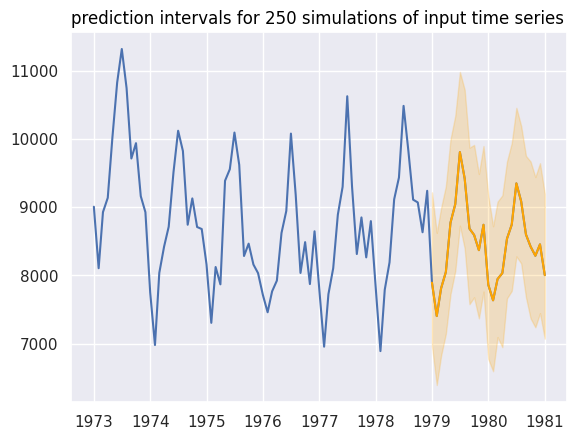

In [63]:
regr2.plot(type_plot="pi")

## 1 - 3 - austa

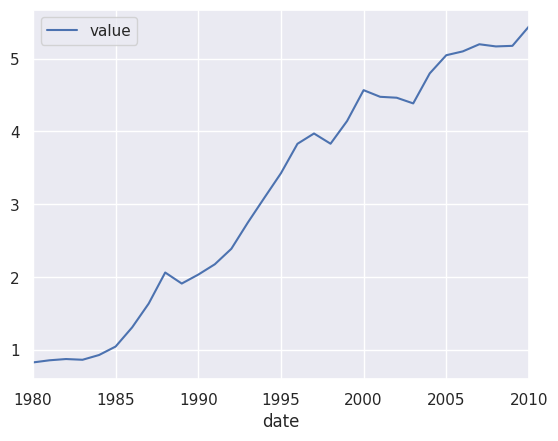

In [64]:
url = "https://raw.githubusercontent.com/Techtonique/datasets/main/time_series/univariate/austa.csv"
df = pd.read_csv(url)
df.index = pd.DatetimeIndex(df.date)
df.drop(columns=['date'], inplace=True)
df.plot()

df_austa = df.copy()

100%|██████████| 1/1 [00:00<00:00, 147.06it/s]


time:  1.136568546295166


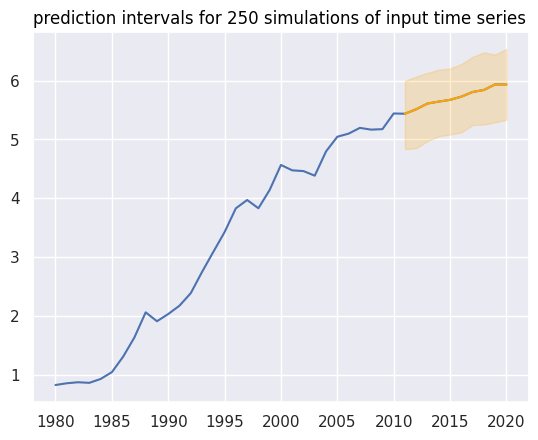

In [65]:
regr4 = ns.MTS(obj=RidgeCV(alphas=[10**i for i in range(-10, 10)]),
              replications=250,
              type_pi="scp2-kde",
              kernel='gaussian',
              lags=15)
start = time()
regr4.fit(df_austa)
regr4.predict(h=10)
print("time: ", time() - start)
regr4.plot(type_plot="pi")

100%|██████████| 1/1 [00:04<00:00,  4.38s/it]


time:  29.955562114715576


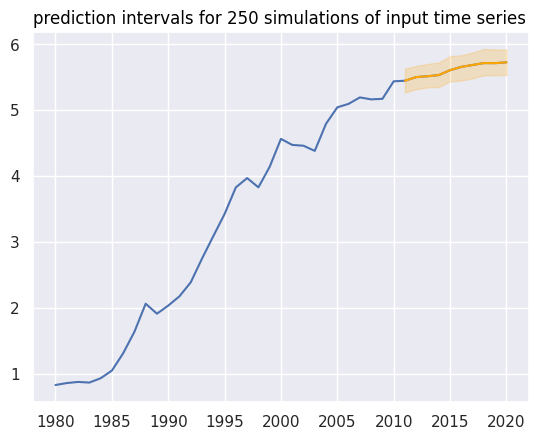

In [66]:
regr4 = ns.MTS(obj=TabPFNRegressor(),
              replications=250,
              kernel='gaussian',
              lags=15)
start = time()
regr4.fit(df_austa)
regr4.predict(h=10)
print("time: ", time() - start)
regr4.plot(type_plot="pi")

## 1 - 4 - Nile

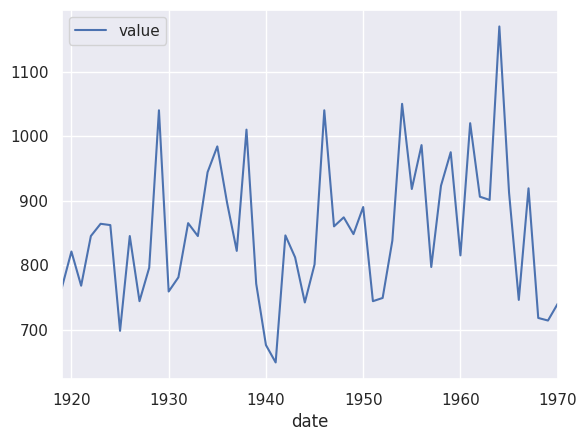

In [67]:
url = "https://raw.githubusercontent.com/Techtonique/datasets/main/time_series/univariate/nile.csv"
df = pd.read_csv(url)
df.index = pd.DatetimeIndex(df.date)
df.drop(columns=['date'], inplace=True)
df.plot()

df_nile = df.copy()

100%|██████████| 1/1 [00:00<00:00, 89.15it/s]


time:  1.7347002029418945


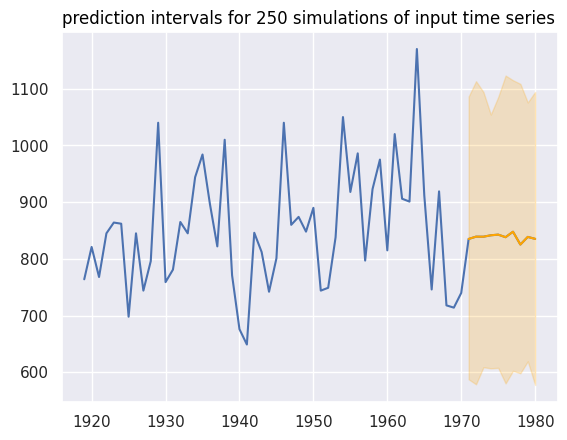

In [68]:
regr4 = ns.MTS(obj=RidgeCV(alphas=[10**i for i in range(-10, 10)]),
              replications=250,
              type_pi="scp2-kde",
              kernel='gaussian',
              lags=15)
start = time()
regr4.fit(df_nile)
regr4.predict(h=10)
print("time: ", time() - start)
regr4.plot(type_plot="pi")

100%|██████████| 1/1 [00:04<00:00,  4.50s/it]


time:  33.400973081588745


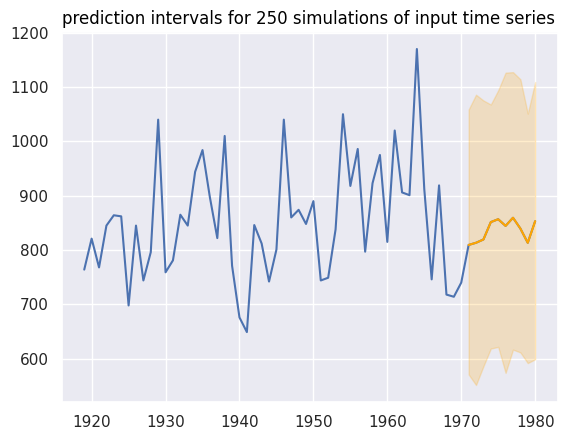

In [69]:
regr4_ = ns.MTS(obj=TabPFNRegressor(),
              replications=250,
              type_pi="scp2-kde",
              kernel='gaussian',
              lags=15)
start = time()
regr4_.fit(df_nile)
regr4_.predict(h=10)
print("time: ", time() - start)
regr4_.plot(type_plot="pi")

# 2 - Multivariate

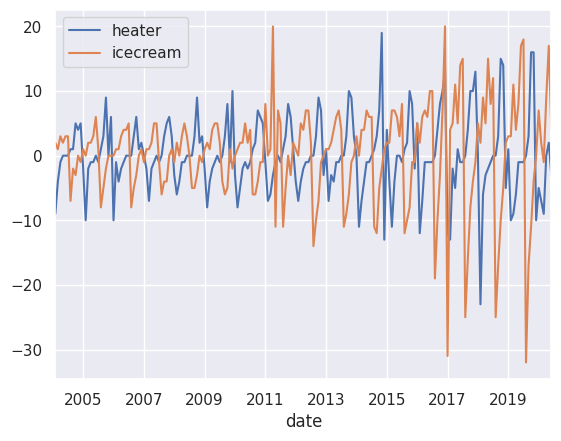

In [70]:
url = "https://raw.githubusercontent.com/Techtonique/datasets/main/time_series/multivariate/ice_cream_vs_heater.csv"
df_temp = pd.read_csv(url)
df_temp.index = pd.DatetimeIndex(df_temp.date)
df = df_temp.drop(columns=['date']).diff().dropna()
df.plot()

df_heat = df.copy()


 Adjusting RidgeCV to multivariate time series... 
 


100%|██████████| 2/2 [00:00<00:00, 104.81it/s]


 Simulate residuals using gaussian kernel... 




 Best parameters for gaussian kernel: {'bandwidth': 0.75717214883374} 



100%|██████████| 250/250 [00:00<00:00, 7131.91it/s]


time:  1.3256967067718506


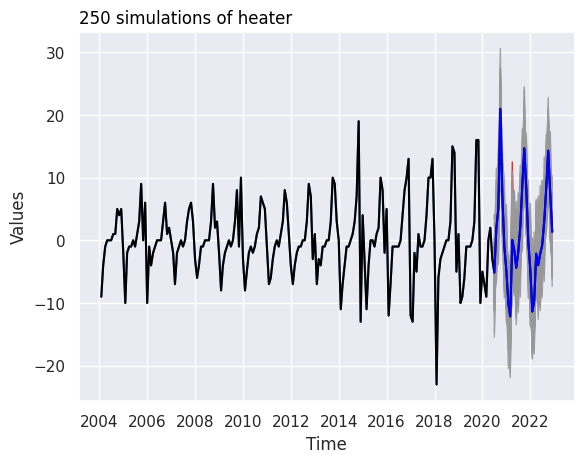

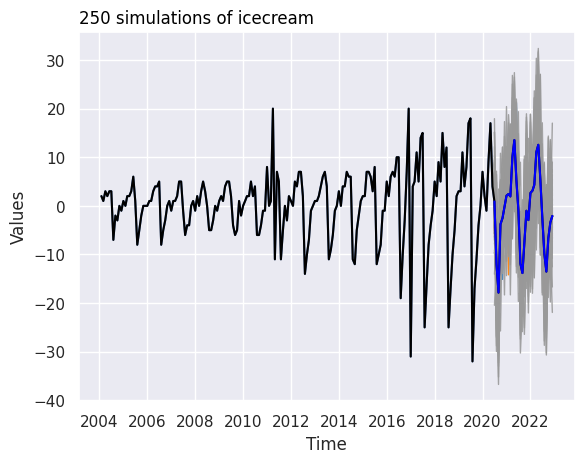

In [71]:
obj_MTS = ns.MTS(obj = RidgeCV(alphas=[10**i for i in range(-10, 10)]),
                 lags = 15,
                 n_hidden_features=5,
                 replications=250,
                 type_pi="scp2-kde",
                 kernel='gaussian',
                 verbose = 1)
start = time()
obj_MTS.fit(df_heat)
res = obj_MTS.predict(h=30);
print("time: ", time() - start)
obj_MTS.plot("heater", type_plot="spaghetti")
obj_MTS.plot("icecream", type_plot="spaghetti")


 Adjusting TabPFNRegressor to multivariate time series... 
 


100%|██████████| 2/2 [00:55<00:00, 27.81s/it]



 Simulate residuals using gaussian kernel... 


 Best parameters for gaussian kernel: {'bandwidth': 0.6290102436234454} 



100%|██████████| 250/250 [00:00<00:00, 6120.07it/s]


time:  912.1651566028595


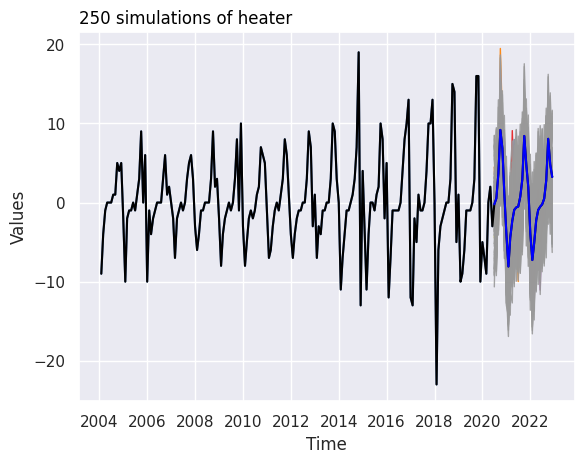

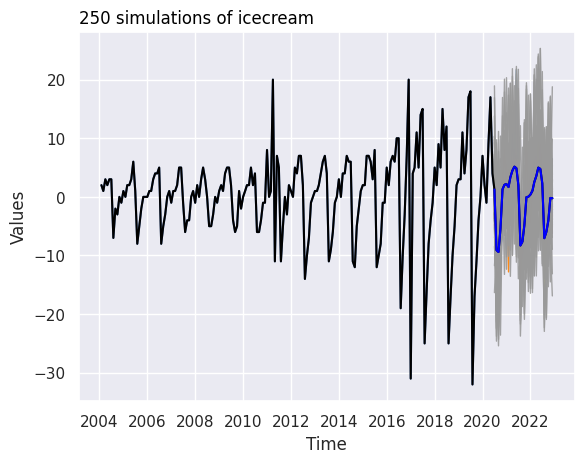

In [72]:
obj_MTS_ = ns.MTS(obj = TabPFNRegressor(),
                 lags = 15,
                 n_hidden_features=5,
                 replications=250,
                 type_pi="scp2-kde",
                 kernel='gaussian',
                 verbose = 1)
start = time()
obj_MTS_.fit(df_heat)
res = obj_MTS_.predict(h=30);
print("time: ", time() - start)
obj_MTS_.plot("heater", type_plot="spaghetti")
obj_MTS_.plot("icecream", type_plot="spaghetti")